Fake Currency Detection is a real problem for both individuals and businesses. Counterfeiters are constantly finding new methods and techniques to produce counterfeit banknotes, which are essentially indistinguishable from real money. At least for the human eye. In this project, I will introduce you to Fake Currency Detection with Machine Learning.

Fake Currency Detection is a task of binary classification in machine learning. If we have enough data on real and fake banknotes, we can use that data to train a model that can classify the new banknotes as real or fake.

### Fake Currency Detection:

The dataset contains these four input characteristics:

- The variance of the image transformed into wavelets
- The asymmetry of the image transformed into wavelets
- Kurtosis of the image transformed into wavelets
- Image entropy

The target value is simply 0 for real banknotes and 1 for fake banknotes. Now let’s get started with this task of Fake Currency Detection with Machine Learning. I will start this task by importing the necessary packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

Now, let’s have a look at the dataset, the data does not have headings so I will also assign headings in the process and then I will print the first 5 rows from the data:

In [2]:
data = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Fake Currency Detection with Machine Learning\data_banknote_authentication.txt', header=None)
data.columns = ['var', 'skew', 'curt', 'entr', 'auth']
print(data.head())

       var    skew    curt     entr  auth
0  3.62160  8.6661 -2.8073 -0.44699     0
1  4.54590  8.1674 -2.4586 -1.46210     0
2  3.86600 -2.6383  1.9242  0.10645     0
3  3.45660  9.5228 -4.0112 -3.59440     0
4  0.32924 -4.4552  4.5718 -0.98880     0


### Data Exploration

Now let’s start exploring the dataset. First, I’ll check the data types and if there are any missing values ​​in the data:

In [3]:
print(data.info)

<bound method DataFrame.info of           var      skew     curt     entr  auth
0     3.62160   8.66610  -2.8073 -0.44699     0
1     4.54590   8.16740  -2.4586 -1.46210     0
2     3.86600  -2.63830   1.9242  0.10645     0
3     3.45660   9.52280  -4.0112 -3.59440     0
4     0.32924  -4.45520   4.5718 -0.98880     0
...       ...       ...      ...      ...   ...
1367  0.40614   1.34920  -1.4501 -0.55949     1
1368 -1.38870  -4.87730   6.4774  0.34179     1
1369 -3.75030 -13.45860  17.5932 -2.77710     1
1370 -3.56370  -8.38270  12.3930 -1.28230     1
1371 -2.54190  -0.65804   2.6842  1.19520     1

[1372 rows x 5 columns]>


We, therefore, have no missing values ​​in the data. We can now draw a pair diagram to get an overview of the relationship between all the entities. I will also colour the observations: blue for genuine banknotes and orange for counterfeit banknotes:

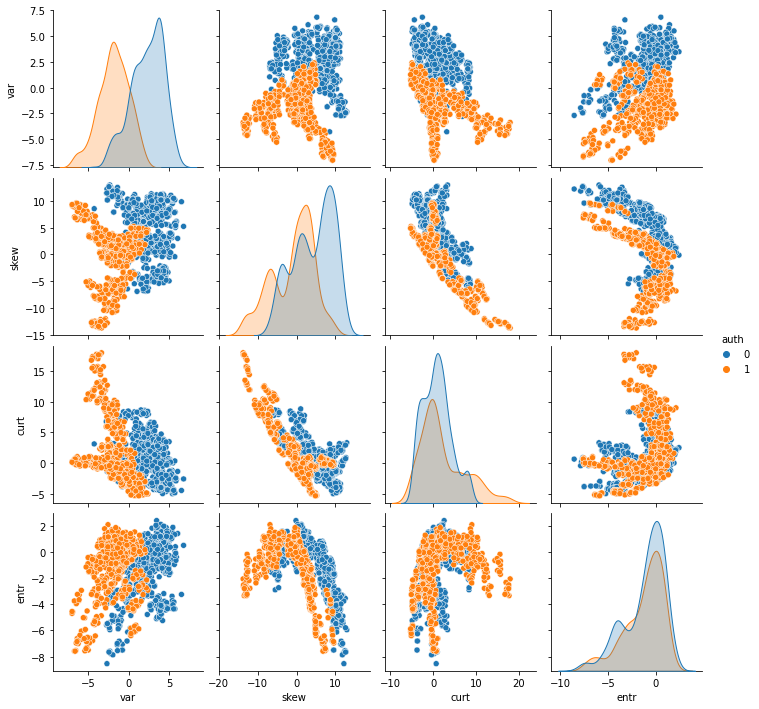

In [4]:
sns.pairplot(data, hue='auth')
plt.show()

From this pair plot we can make several interesting observations:

- The distribution of both variance and skewness appears to be quite different for the two target characteristics, while kurtosis and entropy appear to be more similar.
- There are clear linear and nonlinear trends in the input features.
- Some characteristics seem to be correlated.
- Some features seem to separate genuine and fake banknotes quite well.

Now let’s check if our data is balanced against the target values:

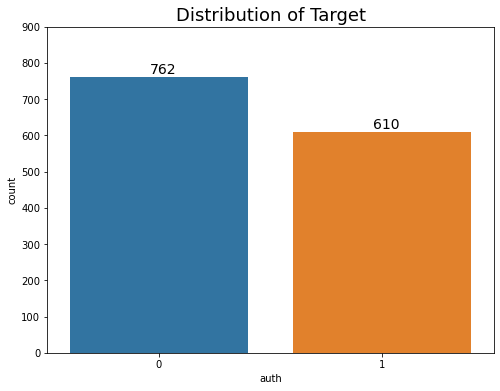

In [6]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Target', size=18)
sns.countplot(x=data['auth'])
target_count = data.auth.value_counts()
plt.annotate(text=target_count[0], xy=(-0.04,10+target_count[0]), size=14)
plt.annotate(text=target_count[1], xy=(0.96,10+target_count[1]), size=14)
plt.ylim(0,900)
plt.show()

The dataset is fairly balanced, but for the binary classification task, we need to balance it perfectly. So let’s start preprocessing the data by doing just that.

### Data Processing

Now we need to balance our data, the easiest way to do this is to randomly drop a number of instances of the overrepresented target function. This is called random undersampling.

Otherwise, we could also create new synthetic data for the under-represented target class. This is called oversampling. For now, let’s start by randomly deleting 152 observations of actual banknotes:

In [7]:
nb_to_delete = target_count[0] - target_count[1]
data = data.sample(frac=1, random_state=42).sort_values(by='auth')
data = data[nb_to_delete:]
print(data['auth'].value_counts())

0    610
1    610
Name: auth, dtype: int64


Now we have a perfectly balanced dataset. Next, we need to divide the data into training and test sets:

In [8]:
x = data.loc[:, data.columns != 'auth']
y = data.loc[:, data.columns == 'auth']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Now I will standardize the data by using the StandardScalar method provided by Scikit-learn:

In [9]:
scalar = StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

### Logistic Regression for Fake Currency Detection

Now, I will train and test our model for fake currency detection by using the Logistic Regressing Algorithm. Let’s first fit the data on the Logistic Regression model to train the model:

In [10]:
clf = LogisticRegression(solver='lbfgs', random_state=42, multi_class='auto')
clf.fit(x_train, y_train.values.ravel())

LogisticRegression(random_state=42)

Now let’s test the accuracy of our model:

In [11]:
y_pred = np.array(clf.predict(x_test))
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                        columns=["Pred.Negative", "Pred.Positive"],
                        index=['Act.Negative', "Act.Positive"])
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = round((tn+tp)/(tn+fp+fn+tp), 4)
print(conf_mat)
print(f'\n Accuracy = {round(100*accuracy, 2)}%')

              Pred.Negative  Pred.Positive
Act.Negative            187              6
Act.Positive              0            173

 Accuracy = 98.36%


The logistic regression model achieved an accuracy of 98.36%. And not only that, when our fake currency detection model predicted that a banknote was real, it was correct 100% of the time.

Now let’s simulate the prediction of a single banknote. All we need to do is extract the features, scale them, and integrate them into our pre-trained model. We can also inspect the banknote probabilities of belonging to each target class:

In [12]:
new_banknote = np.array([4.5, -8.1, 2.4, 1.4], ndmin=2)
new_banknote = scalar.transform(new_banknote)
print(f'Prediction:  Class{clf.predict(new_banknote)[0]}')
print(f'Probability [0/1]:  {clf.predict_proba(new_banknote)[0]}')

Prediction:  Class0
Probability [0/1]:  [0.61112576 0.38887424]


C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Our model predicts that this banknote is real.